# VoxCeleb2 --- Stats

|                    | Dev       |
| ---                | ---       |
| Number of samples  | 1,092,009 |
| Number of speakers |     5,994 |

In [4]:
%load_ext autoreload
%autoreload 2

import os
import sys
os.chdir('../..')
sys.path.insert(1, os.path.join(sys.path[0], '../..'))

In [16]:
from glob import glob
from tqdm import tqdm
import soundfile as sf

from plotnine import *
import pandas as pd
import numpy as np

In [6]:
DATASET_NAME = 'VoxCeleb2'
DATASET_PATH = 'data/voxceleb2'

In [7]:
files = glob(f'{DATASET_PATH}/**/**/*.wav')
speakers = glob(f'{DATASET_PATH}/*')

print(f'Number of samples: {len(files)}')
print(f'Number of speakers: {len(speakers)}')

Number of samples: 1092009
Number of speakers: 5994


## Number of utterances per speaker distribution

In [107]:
speakers = {}
tmp = {}

for file in files:
    speaker = file.split('/')[2]
    if speaker not in speakers:
        speakers[speaker] = 0
        tmp[speaker] = []
    speakers[speaker] += 1
    tmp[speaker].append(file)

In [28]:
utt_per_speaker = np.array(list(speakers.values()))

np.sum(utt_per_speaker < 133) / len(utt_per_speaker)

0.4994994994994995

In [31]:
np.median(utt_per_speaker[utt_per_speaker < 133])

65.0

In [27]:
np.median(utt_per_speaker)

133.0

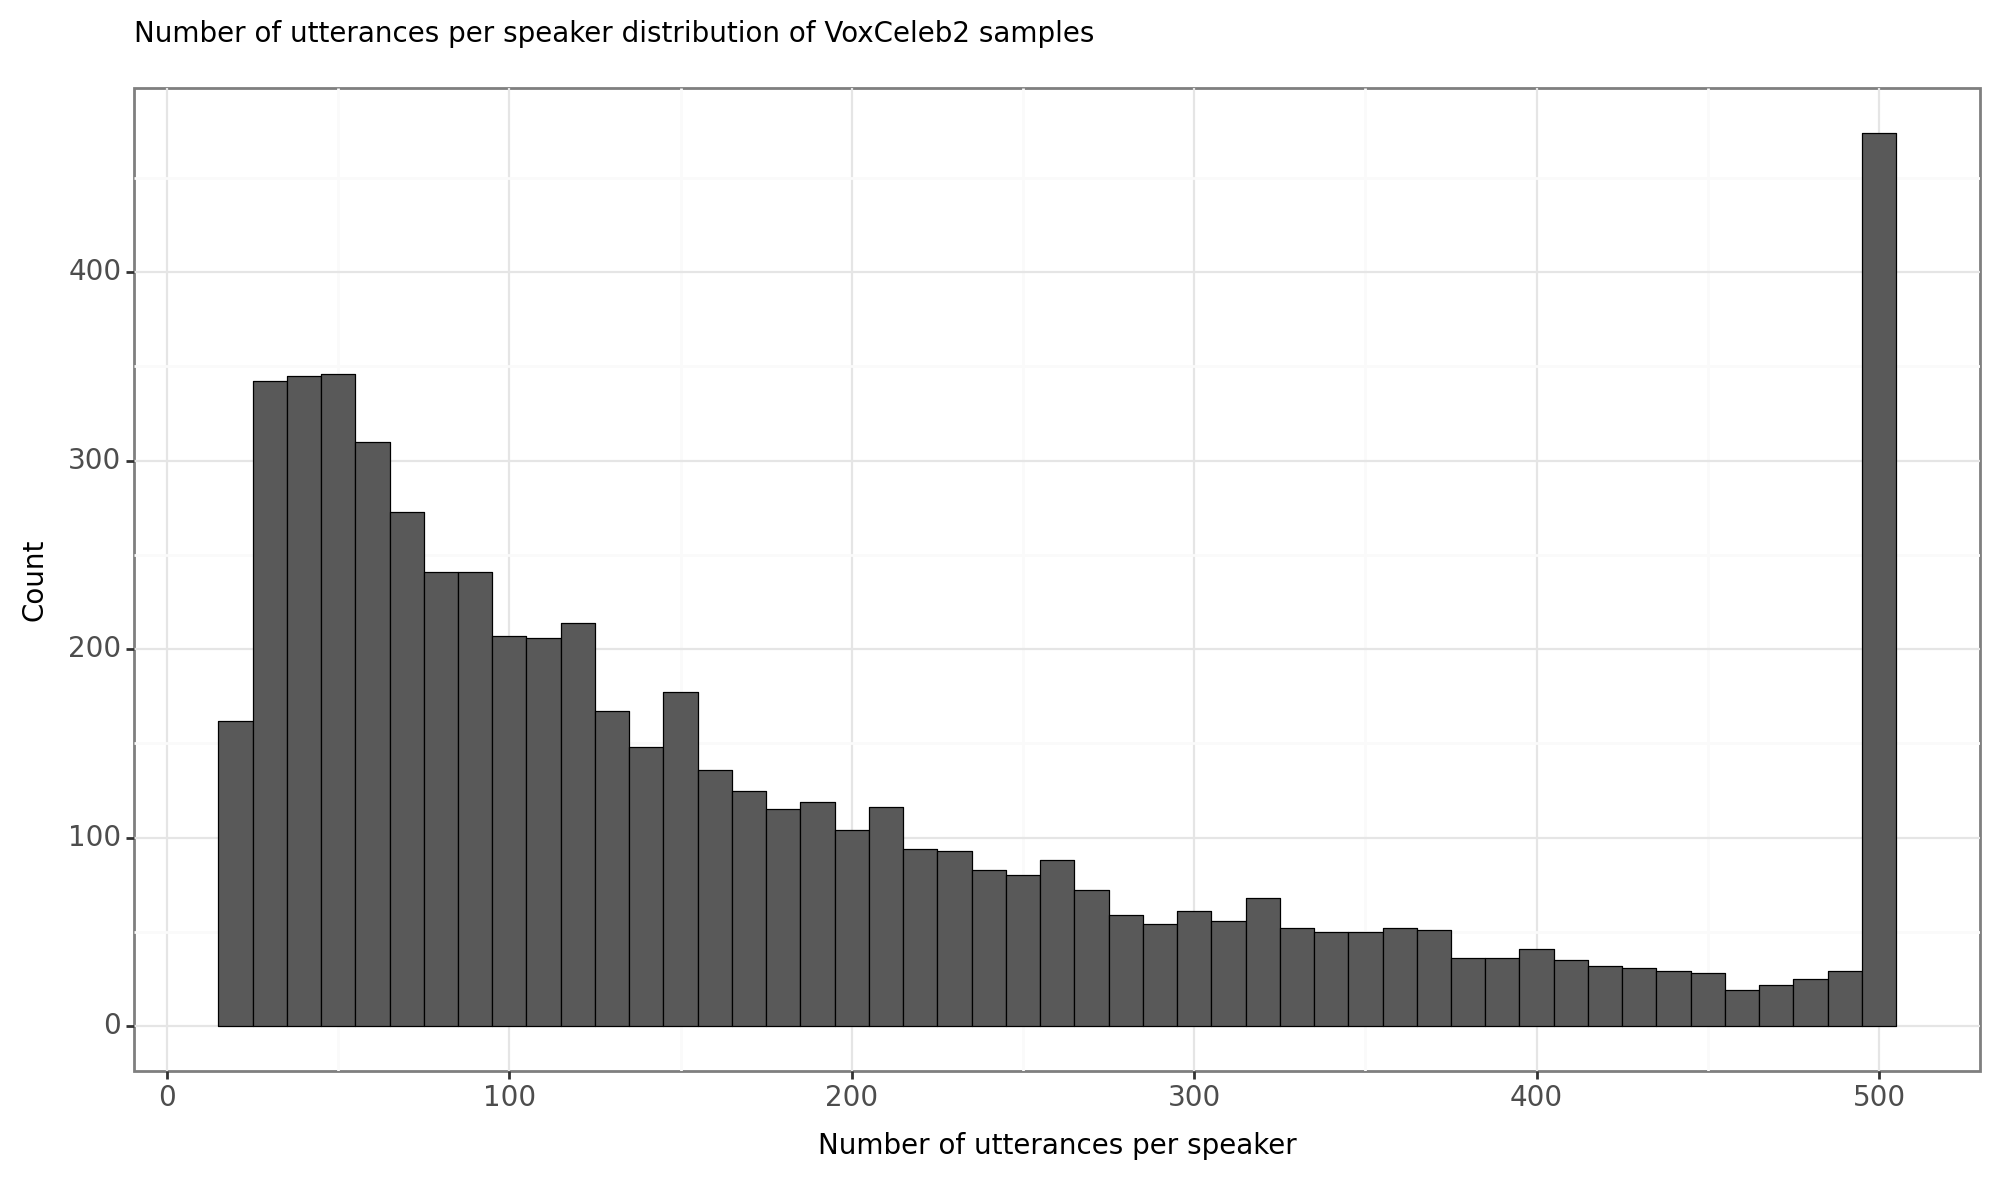

<Figure Size: (1000 x 600)>

In [36]:
plot = (
    ggplot()
    + xlab('Number of utterances per speaker')
    + ylab('Count')
    + ggtitle(f'Number of utterances per speaker distribution of {DATASET_NAME} samples')
    + theme_bw()
    + theme(figure_size=(10, 6), text=element_text(size=10))
    + geom_histogram(
        pd.DataFrame({'Number of utterances per speaker': utt_per_speaker}),
        aes(x='Number of utterances per speaker'),
        binwidth=10,
        color='black',
        position='identity',
        size=0.25
    )
)

plot

In [108]:
for speaker in tmp.keys():
    utterances = tmp[speaker]

    if len(utterances) < 133:
        for _ in range(133 // len(utterances)):
            utterances += utterances
    utterances = utterances[:133]
    
    if speaker == 'id04313':
        print(speaker, len(utterances))
        
    tmp[speaker] = utterances

id04313 133


In [111]:
tmp['id04313'][:52]

['data/voxceleb2/id04313/QQA4thceeNA/00041.wav',
 'data/voxceleb2/id04313/vg_VNmn07sY/00049.wav',
 'data/voxceleb2/id04313/vg_VNmn07sY/00050.wav',
 'data/voxceleb2/id04313/vg_VNmn07sY/00048.wav',
 'data/voxceleb2/id04313/vg_VNmn07sY/00046.wav',
 'data/voxceleb2/id04313/vg_VNmn07sY/00047.wav',
 'data/voxceleb2/id04313/vg_VNmn07sY/00051.wav',
 'data/voxceleb2/id04313/P7WozZlcnZY/00039.wav',
 'data/voxceleb2/id04313/P7WozZlcnZY/00040.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00028.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00019.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00024.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00027.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00020.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00021.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00029.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00026.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00032.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00022.wav',
 'data/voxceleb2/id04313/5qbncq9-tnA/00023.wav',
 'data/voxceleb2/id0

## Length distribution

100%|█████████████████████████████████████████████████████████████████████████| 1092009/1092009 [10:23<00:00, 1752.03it/s]


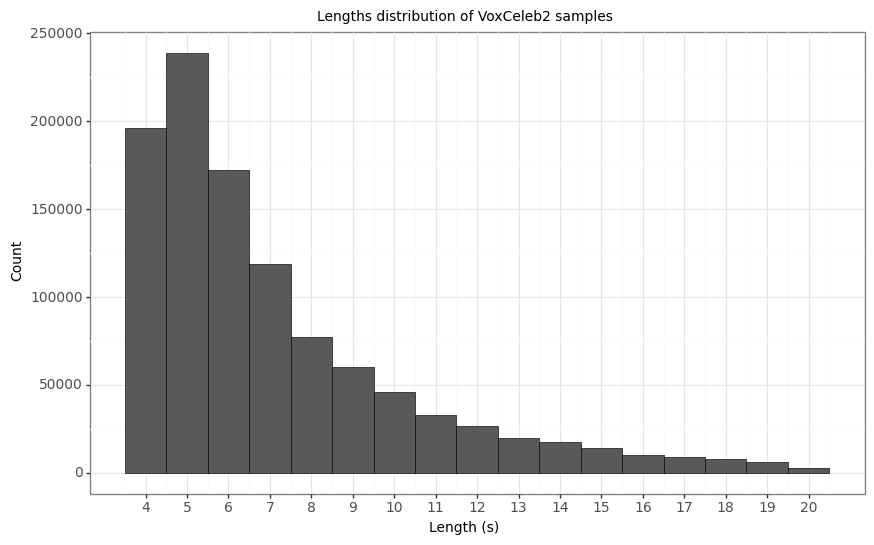

<ggplot: (8757288558803)>

In [4]:
lengths = []

for file in tqdm(files):
    audio, sr = sf.read(file, dtype='int16')
    lengths.append(len(audio))

df_length = pd.DataFrame({'Length': lengths})
df_length['Length'] = df_length['Length'] / 16000
df_length = df_length.drop(df_length[df_length['Length'] > 20].index)

plot = (
    ggplot()
    + xlab('Length (s)')
    + ylab('Count')
    + ggtitle(f'Lengths distribution of {DATASET_NAME} samples')
    + theme_bw()
    + theme(figure_size=(10, 6), text=element_text(size=10))
    + geom_histogram(
        df_length,
        aes(x='Length'),
        binwidth=1,
        color='black',
        position='identity',
        size=0.25
    )
    + scale_x_continuous(breaks=list(range(4, 21, 1)))
)

plot

In [7]:
100 * len(df_length[df_length['Length'] <= 4]) / len(df_length)

1.2694537686908758

In [8]:
100 * len(df_length[df_length['Length'] > 10]) / len(df_length)

19.47919845387041